In this project, I have estimated the house price using the multiple regression model of machine learning.<br>
I hope it was useful for you.<br>
**Raziye Aliakbari**

# Importing laibraris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

# Insert data

In [2]:
df =pd.read_csv("housePrice.csv",header= 0 , sep=',')
df.head()



,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# Type of data


In this section, we get general information about the data and see the number of null data in each column.
<br>
Our csv file has 3479 rows and 8 columns.
<br>
And as we will see, we have a null value in the address column which we remove these values, In the pre-processing section.
<br>
Because it is not possible to use fillna in the address column and it will be practically meaningless, we delete the null lines.

In [3]:
df.shape

(3479, 8)

In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
def show_all(df):
    #This fuction lets us view the full dataframe
    with pd.option_context('display.max_rows', 400, 'display.max_columns', 100):
        display(df)
show_all(df)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


# Pre-processing

 In this part, we will pre-process the data and try to extract the data in a standard way.<br>
We start by deleting null lines in the address column

In [7]:
df =df.dropna(subset =["Address"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


As we have seen above, the column type is the object area, we change the type of this column and evaluate this column and remove the outlier data from this column.

In [8]:
df['Area'] =df['Area'].str.replace(',','')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [9]:
df['Area'] =df['Area'].apply(lambda x : float(x[:]))

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [10]:
df = df[df['Area'] < 1000]

In this section, we convert the Boolean data for 3 <b>columns</b>, <b>elevator</b>,<b> parking</b>, and storage to int

In [11]:
df =df[df['Parking'].notnull()].copy()
df['Parking'] =df['Parking'].astype(int)

In [12]:
df =df[df['Warehouse'].notnull()].copy()
df['Warehouse'] =df['Warehouse'].astype(int)

In [13]:
df =df[df['Elevator'].notnull()].copy()
df['Elevator'] =df['Elevator'].astype(int)

The address column is a non-numeric column.
Machine learning takes only numerical data and as we know, the location of the house plays an effective role in it.
We are trying to convert this string variable into a numeric variable.
<br>
<b>In the following, we will see that it is better to use another feature</b>

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['Address'] =encoder.fit_transform(df.Address)

Now we can see a description of our prepared and numerical data

In [15]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,0.847536,0.915072,0.787536,104.998841,5.375563e+09,1.791854e+05
std,69.550976,0.760216,0.359522,0.278814,0.409111,50.321575,8.125918e+09,2.708639e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,61.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,117.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,146.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,191.000000,9.240000e+10,3.080000e+06


In [16]:
df.shape

(3450, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   int32  
 3   Warehouse   3450 non-null   int32  
 4   Elevator    3450 non-null   int32  
 5   Address     3450 non-null   int32  
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 188.7 KB


In [18]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33


In this section, we can see the dependence of each column on the price column

In [19]:
corr_matrix =df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
Price(USD)    1.000000
Area          0.722611
Room          0.567872
Parking       0.191221
Elevator      0.111745
Warehouse     0.109676
Address      -0.075901
Name: Price, dtype: float64

# Add functional columns

Here we want to create new ratios using the data we have and see the ratio of these new data to the price of each house.

In [20]:
data_for_set_model =df.copy()
mean =(data_for_set_model.groupby('Address').mean()['Area'])
mean_price =data_for_set_model.groupby('Address').mean()['Price']
data_for_set_model['The_value_of_each_address'] =(data_for_set_model['Address'].map(mean_price))/(data_for_set_model['Address'].map(mean))

data_for_set_model

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),The_value_of_each_address
0,63.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07
1,60.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07
2,79.0,2,1,1,1,117,5.500000e+08,18333.33,8.014821e+06
3,95.0,2,1,1,1,152,9.025000e+08,30083.33,9.989330e+06
4,123.0,2,1,1,1,150,7.000000e+09,233333.33,8.590476e+07
...,...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,163,3.500000e+09,116666.67,3.921412e+07
3475,83.0,2,1,1,1,105,6.800000e+09,226666.67,1.108802e+08
3476,75.0,2,0,0,0,115,3.650000e+08,12166.67,6.435927e+06
3477,105.0,2,1,1,1,39,5.600000e+09,186666.67,9.718675e+07


In [21]:

data_for_set_model["Room_pre_Area"] =data_for_set_model['Room']/data_for_set_model["Area"]
data_for_set_model.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),The_value_of_each_address,Room_pre_Area
0,63.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07,0.015873
1,60.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07,0.016667
2,79.0,2,1,1,1,117,5.500000e+08,18333.33,8.014821e+06,0.025316
3,95.0,2,1,1,1,152,9.025000e+08,30083.33,9.989330e+06,0.021053
4,123.0,2,1,1,1,150,7.000000e+09,233333.33,8.590476e+07,0.016260


We check the ratio of the columns to the price again

In [22]:
corr_matrix =data_for_set_model.corr()
corr_matrix["Price"].sort_values(ascending =False)

Price                        1.000000
Price(USD)                   1.000000
Area                         0.722611
The_value_of_each_address    0.664042
Room                         0.567872
Parking                      0.191221
Elevator                     0.111745
Warehouse                    0.109676
Address                     -0.075901
Room_pre_Area               -0.395643
Name: Price, dtype: float64

# Separate train and test data

We divide the main data into two parts, train and test, so that 80% of the total data is allocated to the training data.

In [23]:
data=data_for_set_model.copy()

train_set , test_set =train_test_split(data , test_size =0.2 , random_state =42)
train_set,test_set

(       Area  Room  Parking  Warehouse  Elevator  Address         Price  \
 74     63.0     1        1          1         1      122  2.150000e+09   
 49     60.0     1        1          1         1        1  2.460000e+09   
 2528   85.0     2        1          1         1      117  6.500000e+08   
 2962   41.0     1        0          0         1      160  7.900000e+08   
 815   125.0     3        1          1         1      122  6.300000e+09   
 ...     ...   ...      ...        ...       ...      ...           ...   
 1101   50.0     1        1          1         1      111  1.500000e+09   
 1138  135.0     3        1          1         1      125  2.950000e+09   
 1302   68.0     2        1          1         1      106  2.450000e+09   
 866    77.0     2        1          1         1       57  5.544000e+09   
 3196   73.0     2        1          1         0        9  8.500000e+08   
 
       Price(USD)  The_value_of_each_address  Room_pre_Area  
 74      71666.67               4.41

# Plot the data

array([[<AxesSubplot:xlabel='Room', ylabel='Room'>,
        <AxesSubplot:xlabel='Price', ylabel='Room'>,
        <AxesSubplot:xlabel='Area', ylabel='Room'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Room'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Room'>],
       [<AxesSubplot:xlabel='Room', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Area', ylabel='Price'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Price'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Price'>],
       [<AxesSubplot:xlabel='Room', ylabel='Area'>,
        <AxesSubplot:xlabel='Price', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Area'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Area'>],
       [<AxesSubplot:xlabel='Room', ylabel='The_value_of_each_address'>,
        <AxesSubplot:xlabel='Price', ylabel='T

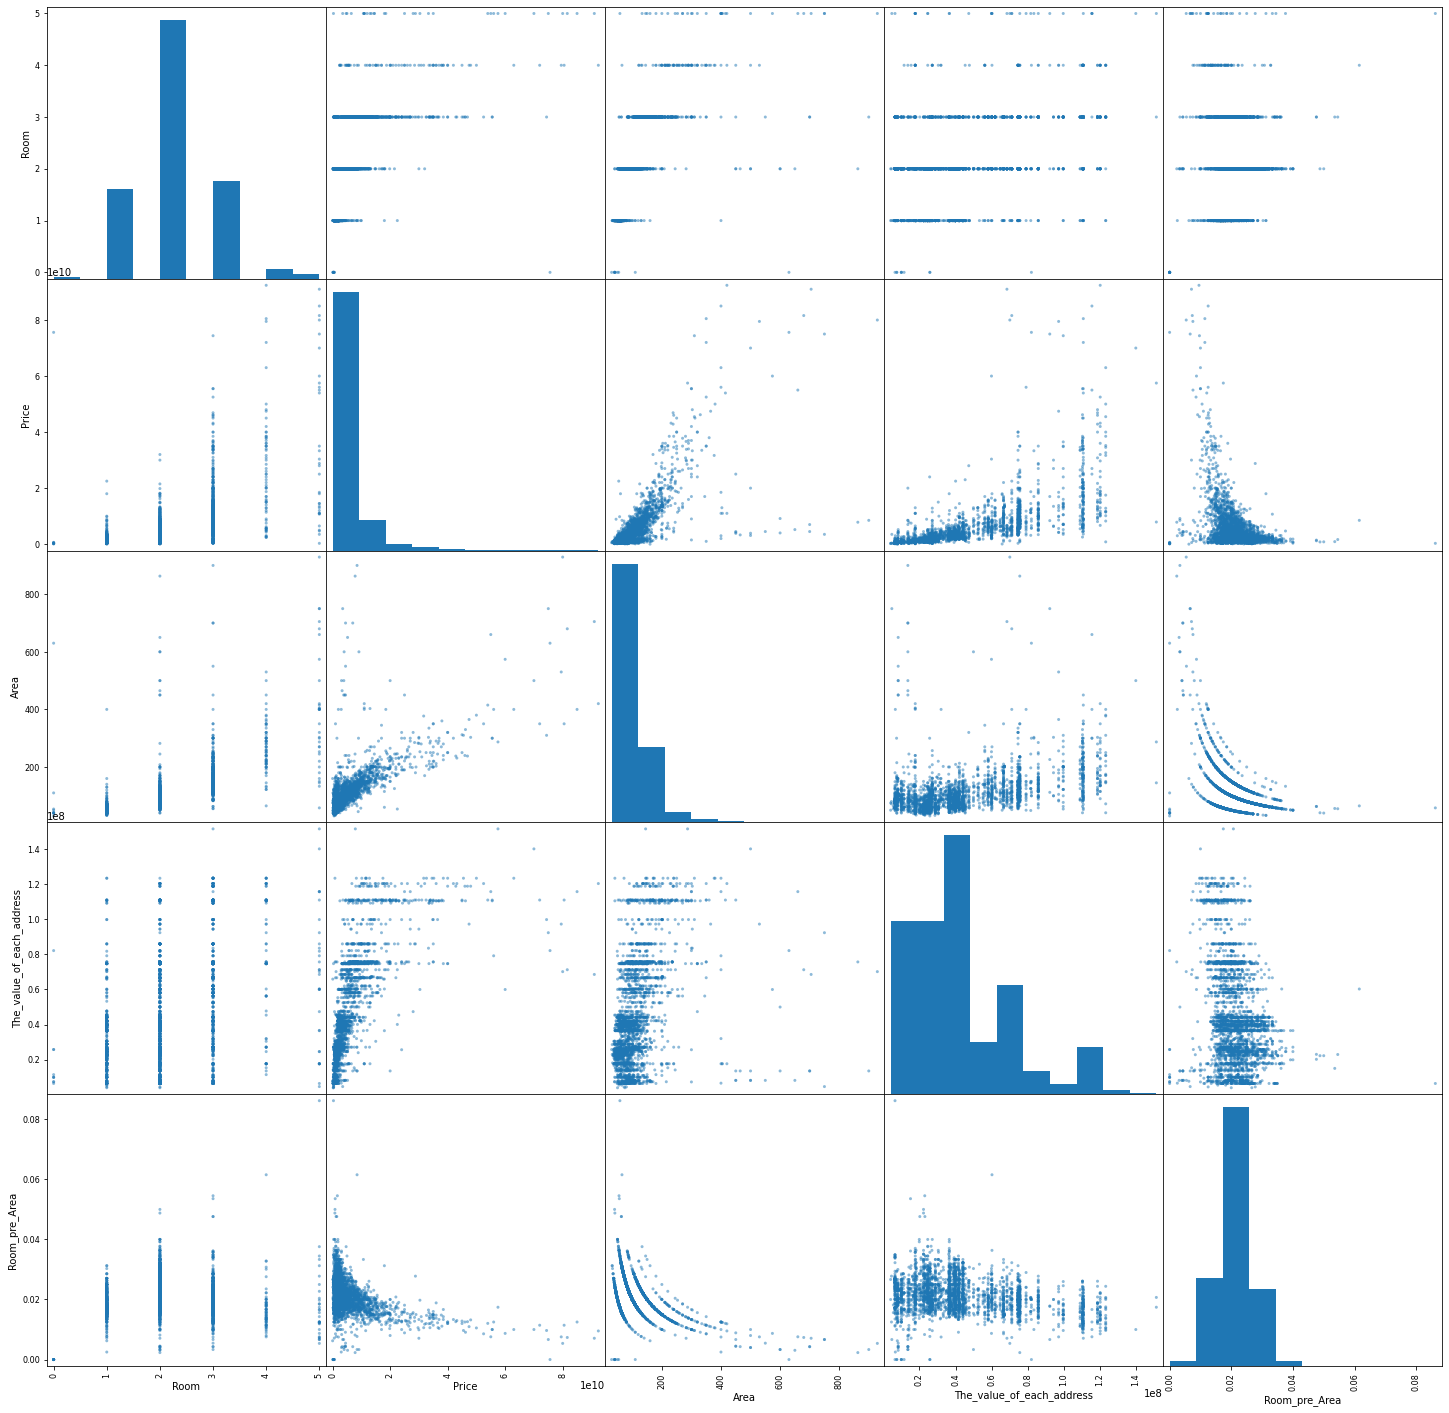

In [24]:
Numerical_chart=['Room','Price','Area','The_value_of_each_address','Room_pre_Area']
scatter_matrix(data[Numerical_chart],figsize=(25,25))

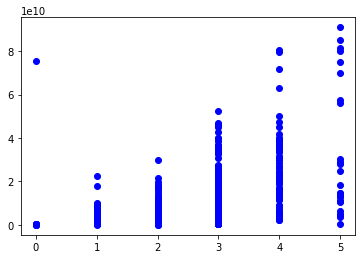

In [25]:
plt.scatter(train_set.Room, train_set.Price,  color='blue')
plt.show()

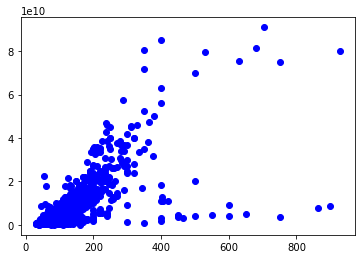

In [26]:
plt.scatter(train_set.Area, train_set.Price,  color='blue')
plt.show()

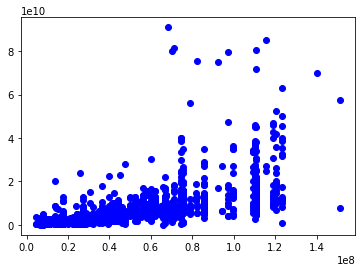

In [27]:
plt.scatter(train_set.The_value_of_each_address, train_set.Price,  color='blue')
plt.show()

# Model

According to the checks made in the given data As we know, the valuation price of a house always has a direct relationship with a series of features.<br>
I tried to identify these features and I have considered a<b> multiple linear regression</b> as a model for evaluation.
According to the knowledge I gained from the data, I have chosen the data that had an impact on the price increase.<br>
My final featuer is<b> The_value_of_each_address, Room, Parking, Area</b>

In [28]:
regr =linear_model.LinearRegression()
x =np.asanyarray(train_set[['The_value_of_each_address','Room','Parking', 'Area']])
y =np.asanyarray(train_set[['Price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.29351109e+02  5.27371860e+08 -1.41202432e+09  6.04167129e+07]]
Intercept:  [-6.56554883e+09]


# Predict

In [29]:
y_hat =regr.predict(test_set[['The_value_of_each_address','Room','Parking','Area']])
x =np.asanyarray(test_set[['The_value_of_each_address','Room','Parking','Area']])
y =np.asanyarray(test_set[['Price']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 23550024605442904064.00
Variance score: 0.69


E:\conda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
